В этом проекты буду пробовать реализоватвывать KAn еть через ЧАТ ГПТ
ЭТОТ ПРОЕКТ ПОЛНАЯ КОПИЯ KanTest1, но здесь я хочу выделить ручками примерно 10% изначальных данных, чтобы потом использовать модель и сравнивать прогнозы с этими 10% 

In [1]:
from kan import *


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from kan import *

# Загрузка данных
data = pd.read_csv('file_for_input/all_hour/SBER_tradestats_test_hour.csv')

# Признаки (X) — все столбцы, кроме целевой переменной
X = data[['vol','val','trades','trades_b','trades_s', 'val_b','val_s','vol_b','vol_s','pr_open_hour','pr_high_hour','pr_low_hour']] # Можно добавить и другие важные признаки


# Целевая переменная (Y) — это `pr_close_hour`
Y = data['pr_close_hour']


# Выделю 10% данных для финального теста
# Определение количества строк для разделения
split_index = int(len(data) * 0.9)

# Разделение DataFrame на два
data_for_final_test = data.iloc[split_index:] # 10% данных полностью не учавствующих в обучении, на них мы будем проводить финальный тест
data = data.iloc[:split_index]
#закончили выделять 10%



train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]
# 
# # Разделение данных на обучающую и тестовую выборки
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # был ещё аргумент , random_state=42


In [4]:
print (X_train.head(10) )
print ("-----------------------------")
print (Y_train )
print ("-----------------------------")
print (X_test )
print ("-----------------------------")
print (Y_test )


        vol           val  trades  trades_b  trades_s        val_b  \
0  393181.0  1.008007e+09  6584.0    3382.0    3202.0  530078472.0   
1  404569.0  1.037253e+09  5842.0    3062.0    2780.0  541698592.0   
2  426476.0  1.097535e+09  6513.0    3814.0    2699.0  670242123.0   
3  313630.0  8.048766e+08  3940.0    1625.0    2315.0  359722639.0   
4  459403.0  1.174223e+09  5677.0    1791.0    3886.0  286277165.0   
5  474581.0  1.207467e+09  6639.0    2153.0    4486.0  397078018.0   
6  288278.0  7.344435e+08  3095.0    1370.0    1725.0  326516768.0   
7  285338.0  7.262520e+08  3589.0    1254.0    2335.0  215418574.0   
8  339804.0  8.655837e+08  4094.0    1443.0    2651.0  294232966.0   
9  415721.0  1.051349e+09  7215.0    2888.0    4327.0  403445977.0   

         val_s     vol_b     vol_s  pr_open_hour  pr_high_hour  pr_low_hour  
0  477928530.0  206729.0  186452.0        255.97        256.97       255.83  
1  495554901.0  211222.0  193347.0        256.15        256.90       255.

In [5]:
# Преобразование данных в тензоры для использования с KAN
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # добавляем ось для соответствия размерностей

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)


In [6]:
# Инициализация KAN модели
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Выбор устройства
model = KAN(width=[X_train.shape[1], 1, 1], grid=3, k=3, seed=1, device=device)



checkpoint directory created: ./model
saving model version 0.0


In [7]:
# Настройка оптимизатора и функции потерь
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()


Epoch 1/200, Loss: 1.3637869784530944e+16
Epoch 2/200, Loss: 1.298399752093696e+16
Epoch 3/200, Loss: 1.235038247059456e+16
Epoch 4/200, Loss: 1.1737174957359104e+16
Epoch 5/200, Loss: 1.114447913418752e+16
Epoch 6/200, Loss: 1.0572356204363776e+16
Epoch 7/200, Loss: 1.0020830863949824e+16
Epoch 8/200, Loss: 9489874121916416.0
Epoch 9/200, Loss: 8979417258786816.0
Epoch 10/200, Loss: 8489356121604096.0
Epoch 11/200, Loss: 8019517837934592.0
Epoch 12/200, Loss: 7569662963351552.0
Epoch 13/200, Loss: 7139564401459200.0
Epoch 14/200, Loss: 6728940831899648.0
Epoch 15/200, Loss: 6337430403678208.0
Epoch 16/200, Loss: 5964609525645312.0
Epoch 17/200, Loss: 5610066417811456.0
Epoch 18/200, Loss: 5273346887385088.0
Epoch 19/200, Loss: 4953955939385344.0
Epoch 20/200, Loss: 4651403410669568.0
Epoch 21/200, Loss: 4365172294549504.0
Epoch 22/200, Loss: 4094733236305920.0
Epoch 23/200, Loss: 3839541580398592.0
Epoch 24/200, Loss: 3599022874951680.0
Epoch 25/200, Loss: 3372618774216704.0
Epoch 26/

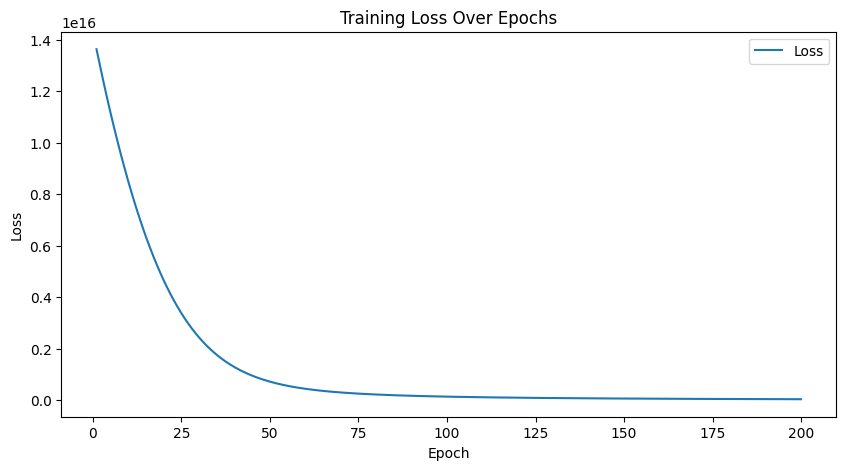

In [8]:
# Обучение модели
epochs = 200
batch_size = 32
losses = []

for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()  # обнуление градиентов
    
    # Прямой проход
    y_pred = model(X_train_tensor)
    
    # Вычисление ошибки
    loss = loss_fn(y_pred, Y_train_tensor)
    losses.append(loss.item())  # Сохраняем значение loss
    
    # Обратный проход и обновление весов
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

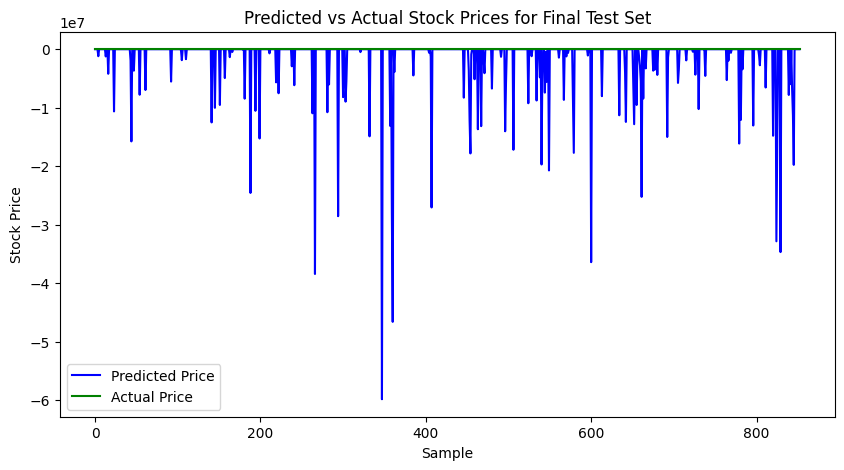

In [9]:
# Преобразуем финальные тестовые данные в тензоры
X_final_test = data_for_final_test[['vol', 'val', 'trades', 'trades_b', 'trades_s', 'val_b', 'val_s', 'vol_b', 'vol_s', 'pr_open_hour', 'pr_high_hour', 'pr_low_hour']]
Y_final_test = data_for_final_test['pr_close_hour']

X_final_test_tensor = torch.tensor(X_final_test.values, dtype=torch.float32)

# Предсказание для данных final test
model.eval()
with torch.no_grad():
    predicted_final_test = model(X_final_test_tensor)

# Преобразование предсказаний и реальных значений для сравнения
predicted_final_test = predicted_final_test.cpu().numpy()
Y_final_test_numpy = Y_final_test.values  # Преобразование в numpy массив

# График предсказанных и реальных значений
plt.figure(figsize=(10, 5))
plt.plot(predicted_final_test, label='Predicted Price', color='blue')
plt.plot(Y_final_test_numpy, label='Actual Price', color='green')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices for Final Test Set')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Рассчитываем MSE и MAE для финального тестового набора
mse = mean_squared_error(Y_final_test_numpy, predicted_final_test)
mae = mean_absolute_error(Y_final_test_numpy, predicted_final_test)

# Выводим результаты
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 26882376128361.48
Mean Absolute Error (MAE): 1368682.8773113734


Дальше просто проверка реальных значений ( зелененькая линия)

In [11]:
# Вывести первые значения для реальных данных
print(Y_final_test.head())  # Проверяем, что содержит столбец pr_close_hour

# Проверим также, не содержат ли данные нулевые значения
print(f'Min value of actual prices: {Y_final_test.min()}')
print(f'Max value of actual prices: {Y_final_test.max()}')


7672    241.82
7673    242.56
7674    243.50
7675    243.66
7676    243.15
Name: pr_close_hour, dtype: float64
Min value of actual prices: 237.27
Max value of actual prices: 275.49


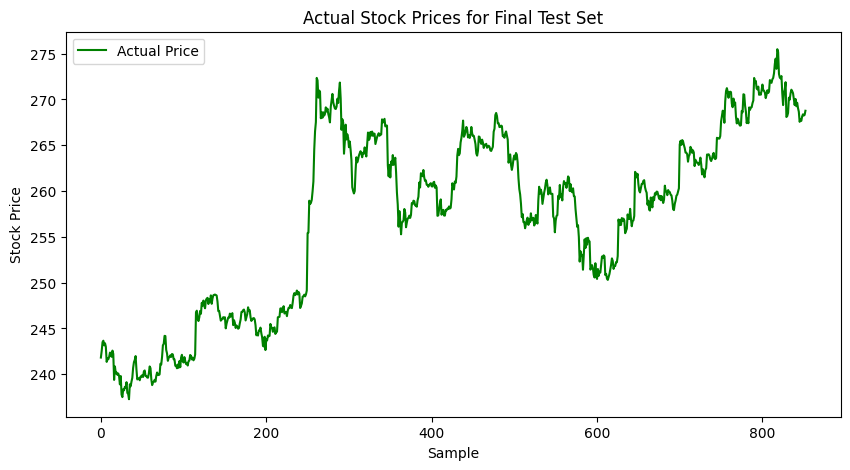

In [12]:
# График только реальных значений Y_final_test_numpy
plt.figure(figsize=(10, 5))
plt.plot(Y_final_test_numpy, label='Actual Price', color='green')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('Actual Stock Prices for Final Test Set')
plt.legend()
plt.show()


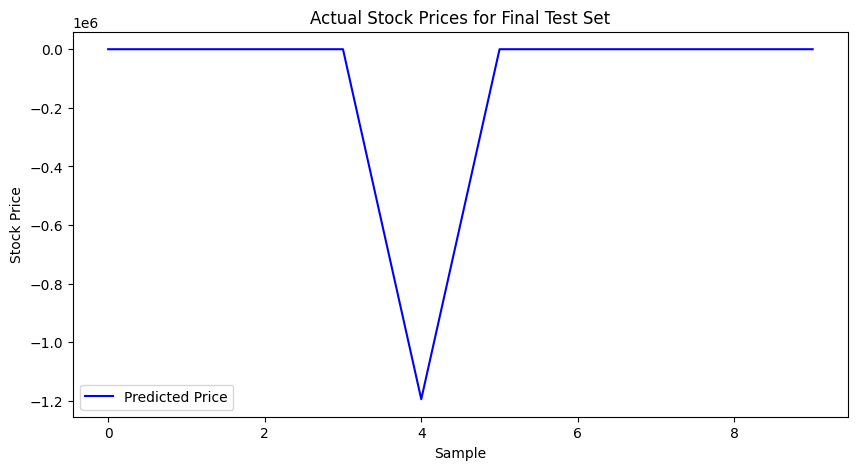

In [14]:
# График только реальных значений Y_final_test_numpy
plt.figure(figsize=(10, 5))
plt.plot(predicted_final_test[:10], label='Predicted Price', color='blue')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('Actual Stock Prices for Final Test Set')
plt.legend()
plt.show()


In [15]:
print(predicted_final_test)

[[ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-1.1940822e+06]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-1.2337726e+06]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-4.1969155e+06]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-1.0627423e+07]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-1.9169991e+06]
 [-1.5752223e+07]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-3.6645415e+06]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [ 0.0000000e+00]
 [-7.7787210e+06]
 [ 0.00000